2) Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('tecdiv.csv')

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp               0
Email Address           0
Name                    0
Email                   0
Roll_no                 0
PRN No.                 0
Mobile No.              0
First year:   Sem 1     3
First year:   Sem 2     0
Second year:   Sem 1    3
Second year:   Sem 2    1
dtype: int64


In [6]:
df.dtypes

Timestamp                object
Email Address            object
Name                     object
Email                    object
Roll_no                  object
PRN No.                  object
Mobile No.                int64
First year:   Sem 1     float64
First year:   Sem 2     float64
Second year:   Sem 1    float64
Second year:   Sem 2    float64
dtype: object

1 - Handle missing values

In [7]:

# before imputation we have to drop all non numeric columns
df.columns = df.columns.str.strip()
col_to_drop = ['Timestamp','Email Address','Name','Email','Roll_no','PRN No.','Mobile No.']
df_1 = df.drop(columns=col_to_drop)
df_1

,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,NaN,8.60,9.80,NaN
1,8.14,8.14,9.32,9.82
2,6.61,6.61,NaN,9.14
3,NaN,7.30,8.90,9.20
4,7.05,7.45,9.05,9.40
...,...,...,...,...
59,0.00,0.00,9.09,9.36
60,8.31,8.27,9.45,9.77
61,8.31,8.42,8.53,8.64
62,8.70,8.50,8.70,8.80


In [8]:
from sklearn.impute import SimpleImputer

# Using Mean strategy
imputer_mean = SimpleImputer(strategy='mean')

# Using Median strategy
imputer_median = SimpleImputer(strategy='median')

# Using Most Frequent strategy
imputer_mode = SimpleImputer(strategy='most_frequent')

# Using Constant strategy
imputer_constant = SimpleImputer(strategy='constant', fill_value=6)


In [9]:
# using mean strategy
df_mean = pd.DataFrame(imputer_mean.fit_transform(df_1), columns=df_1.columns)
df_mean

,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,8.870656,8.60,9.800000,9.368889
1,8.140000,8.14,9.320000,9.820000
2,6.610000,6.61,9.277377,9.140000
3,8.870656,7.30,8.900000,9.200000
4,7.050000,7.45,9.050000,9.400000
...,...,...,...,...
59,0.000000,0.00,9.090000,9.360000
60,8.310000,8.27,9.450000,9.770000
61,8.310000,8.42,8.530000,8.640000
62,8.700000,8.50,8.700000,8.800000


In [10]:
# Using median strategy
df_median = pd.DataFrame(imputer_median.fit_transform(df_1), columns=df_1.columns)
df_median

,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,8.25,8.60,9.80,9.45
1,8.14,8.14,9.32,9.82
2,6.61,6.61,9.44,9.14
3,8.25,7.30,8.90,9.20
4,7.05,7.45,9.05,9.40
...,...,...,...,...
59,0.00,0.00,9.09,9.36
60,8.31,8.27,9.45,9.77
61,8.31,8.42,8.53,8.64
62,8.70,8.50,8.70,8.80


In [11]:
# using most frequent strategy
df_most_frequent = pd.DataFrame(imputer_mode.fit_transform(df_1), columns=df_1.columns)
df_most_frequent

,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,0.00,8.60,9.80,9.66
1,8.14,8.14,9.32,9.82
2,6.61,6.61,9.05,9.14
3,0.00,7.30,8.90,9.20
4,7.05,7.45,9.05,9.40
...,...,...,...,...
59,0.00,0.00,9.09,9.36
60,8.31,8.27,9.45,9.77
61,8.31,8.42,8.53,8.64
62,8.70,8.50,8.70,8.80


In [12]:
# using const strategy
df_const = pd.DataFrame(imputer_constant.fit_transform(df_1), columns=df_1.columns)
df_const

,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,6.00,8.60,9.80,6.00
1,8.14,8.14,9.32,9.82
2,6.61,6.61,6.00,9.14
3,6.00,7.30,8.90,9.20
4,7.05,7.45,9.05,9.40
...,...,...,...,...
59,0.00,0.00,9.09,9.36
60,8.31,8.27,9.45,9.77
61,8.31,8.42,8.53,8.64
62,8.70,8.50,8.70,8.80


i. Handling it manually


In [13]:
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'Grace', 'Hannah', 'Ian', 'Julia'],
    'First year: Sem 1': [None, None, None, None, None, None, 67, 57, 82, 98],
    'First year: Sem 2': [None, None, 95, 88, 88, 52, 95, 81, 70, 62],
    'Second year: Sem 1': [ None, None,90, 82, 88, 99, 67, 57, 82, 98],
    'Second year: Sem 2': [ None,88, 85, 90, 92, 52, 95, 81, 70, 62]
}
df_2 = pd.DataFrame(data)

In [14]:
# 1. drop column or row with missing values
# for row
df_cleaned_rows = df_2.dropna()
# df_cleaned_rows
# for column
df_cleaned_cols = df_1.dropna(axis=1)
# df_cleaned_cols

In [15]:
# 2. mean
df_mean = df_2.copy()
mean_value = df_mean['First year: Sem 1'].mean()
df_mean['First year: Sem 1'].fillna(mean_value, inplace=True)
df_mean

,Student_ID,Name,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1,Alice,76.0,NaN,NaN,NaN
1,2,Bob,76.0,NaN,NaN,88.0
2,3,Charlie,76.0,95.0,90.0,85.0
3,4,David,76.0,88.0,82.0,90.0
4,5,Emily,76.0,88.0,88.0,92.0
5,6,Frank,76.0,52.0,99.0,52.0
6,7,Grace,67.0,95.0,67.0,95.0
7,8,Hannah,57.0,81.0,57.0,81.0
8,9,Ian,82.0,70.0,82.0,70.0
9,10,Julia,98.0,62.0,98.0,62.0


In [16]:
# 3 . MEDIAN

df_median = df_2.copy()

median_value = df_median['First year: Sem 1'].median()
df_median['First year: Sem 1'].fillna(median_value, inplace=True)
df_median

,Student_ID,Name,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1,Alice,74.5,NaN,NaN,NaN
1,2,Bob,74.5,NaN,NaN,88.0
2,3,Charlie,74.5,95.0,90.0,85.0
3,4,David,74.5,88.0,82.0,90.0
4,5,Emily,74.5,88.0,88.0,92.0
5,6,Frank,74.5,52.0,99.0,52.0
6,7,Grace,67.0,95.0,67.0,95.0
7,8,Hannah,57.0,81.0,57.0,81.0
8,9,Ian,82.0,70.0,82.0,70.0
9,10,Julia,98.0,62.0,98.0,62.0


In [17]:
# 4. Impute missing values with a custom value
df_const = df_2.copy()
custom_value = 11
df_const['First year: Sem 1'].fillna(custom_value, inplace=True)
df_const

,Student_ID,Name,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1,Alice,11.0,NaN,NaN,NaN
1,2,Bob,11.0,NaN,NaN,88.0
2,3,Charlie,11.0,95.0,90.0,85.0
3,4,David,11.0,88.0,82.0,90.0
4,5,Emily,11.0,88.0,88.0,92.0
5,6,Frank,11.0,52.0,99.0,52.0
6,7,Grace,67.0,95.0,67.0,95.0
7,8,Hannah,57.0,81.0,57.0,81.0
8,9,Ian,82.0,70.0,82.0,70.0
9,10,Julia,98.0,62.0,98.0,62.0


Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

In [18]:
import pandas as pd
import numpy as np

# Create the DataFrame
data = {
    'Student_ID': np.arange(1, 11),
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'Grace', 'Hannah', 'Ian', 'Julia'],
    'Math_Score': [85, 95, 82, 91, 2, 1, 67, 57, 82, 98],
    'Science_Score': np.random.randint(50, 100, 10),
    'English_Score': np.random.randint(50, 100, 10),
    'History_Score': np.random.randint(50, 100, 10)
}
df_3 = pd.DataFrame(data)



In [19]:
# Calculate IQR for each numeric column
Q1 = df_3.quantile(0.25)
Q3 = df_3.quantile(0.75)
IQR = Q3 - Q1


# Detect outliers using IQR method
outliers = ((df_3 < (Q1 - 1.5 * IQR)) | (df_3 > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers)

# Print rows with outliers
print("Rows with outliers:")
print(df_3[outliers])

# Remove outliers using IQR method
df_cleaned_iqr = df_3[~outliers]
print("\nDataFrame after removing outliers using IQR method:")
df_cleaned_iqr



0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8    False
9    False
dtype: bool
Rows with outliers:
   Student_ID   Name  Math_Score  Science_Score  English_Score  History_Score
4           5  Emily           2             97             93             50
5           6  Frank           1             66             67             75

DataFrame after removing outliers using IQR method:


C:\Users\HP\AppData\Local\Temp\ipykernel_8984\2371460799.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_3.quantile(0.25)
C:\Users\HP\AppData\Local\Temp\ipykernel_8984\2371460799.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_3.quantile(0.75)
C:\Users\HP\AppData\Local\Temp\ipykernel_8984\2371460799.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_3 < (Q1 - 1.5 * IQR)) | (df_3 > (Q3 + 1.5 * IQR))).any(axis=1)


,Student_ID,Name,Math_Score,Science_Score,English_Score,History_Score
0,1,Alice,85,85,94,81
1,2,Bob,95,62,72,88
2,3,Charlie,82,95,89,59
3,4,David,91,78,59,67
6,7,Grace,67,86,86,83
7,8,Hannah,57,80,61,98
8,9,Ian,82,54,84,85
9,10,Julia,98,83,68,76


Apply data transformations

In [20]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [30000, 45000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
}
df_4 = pd.DataFrame(data)



In [21]:
# Change the scale for better understanding of the variable (Income) using Min-Max scaling:
# Apply Min-Max scaling to Income column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_4['Scaled Income'] = scaler.fit_transform(df_4[['Income']])

print(df_4[['ID', 'Age', 'Scaled Income']])




   ID  Age  Scaled Income
0   1   25           0.00
1   2   30           0.15
2   3   35           0.30
3   4   40           0.40
4   5   45           0.50
5   6   50           0.60
6   7   55           0.70
7   8   60           0.80
8   9   65           0.90
9  10   70           1.00


   ID  Log(Age)  Income
0   1  3.218876   30000
1   2  3.401197   45000
2   3  3.555348   60000
3   4  3.688879   70000
4   5  3.806662   80000
5   6  3.912023   90000
6   7  4.007333  100000
7   8  4.094345  110000
8   9  4.174387  120000
9  10  4.248495  130000


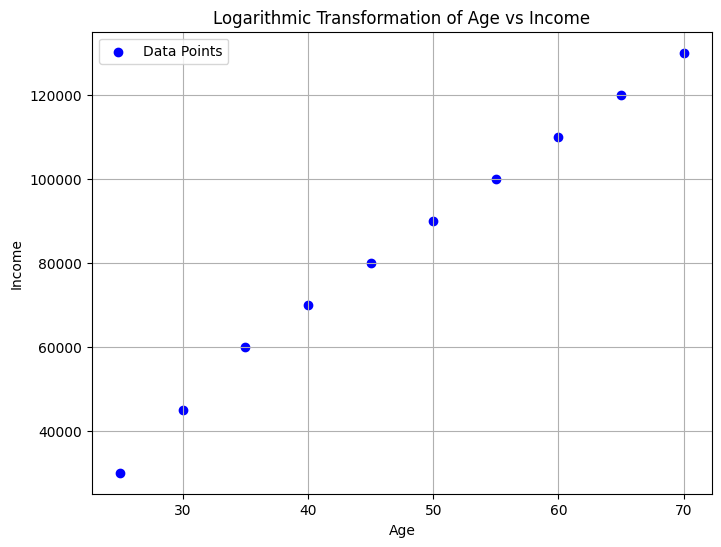

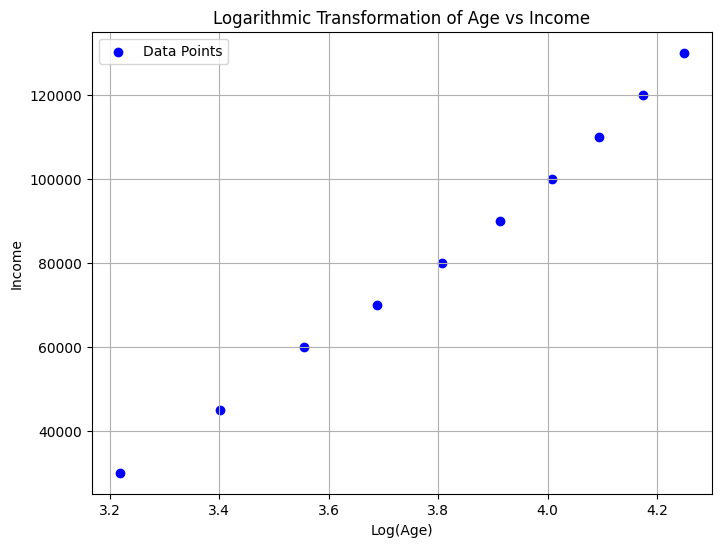

In [22]:
# Convert a non-linear relation into a linear one (Age) using a logarithmic transformation:
# Apply logarithmic transformation to Age column
import numpy as np

df_4['Log(Age)'] = np.log(df_4['Age'])

print(df_4[['ID', 'Log(Age)', 'Income']])

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_4['Age'], df_4['Income'], color='blue', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Logarithmic Transformation of Age vs Income')
plt.legend()
plt.grid(True)
plt.show()
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df_4['Log(Age)'], df_4['Income'], color='blue', label='Data Points')
plt.xlabel('Log(Age)')
plt.ylabel('Income')
plt.title('Logarithmic Transformation of Age vs Income')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Decrease skewness and convert the distribution into a normal distribution (Income) using a Box-Cox transformation:
# Add a constant to make Income positive
df_4['Transformed Income'] = df_4['Income'] + 10000  # Adding 10000 for illustration, adjust as needed

# Apply Box-Cox transformation
from scipy.stats import boxcox

df_4['Transformed Income'], lambda_value = boxcox(df_4['Transformed Income'])
print(lambda_value)
df_4

1.0505019149943526


,ID,Age,Income,Scaled Income,Log(Age),Transformed Income
0,1,25,30000,0.00,3.218876,65023.392954
1,2,30,45000,0.15,3.401197,90857.061028
2,3,35,60000,0.30,3.555348,117053.495982
3,4,40,70000,0.40,3.688879,134680.742716
4,5,45,80000,0.50,3.806662,152419.903643
5,6,50,90000,0.60,3.912023,170259.086291
6,7,55,100000,0.70,4.007333,188188.735782
7,8,60,110000,0.80,4.094345,206201.002425
8,9,65,120000,0.90,4.174387,224289.319417
9,10,70,130000,1.00,4.248495,242448.109862


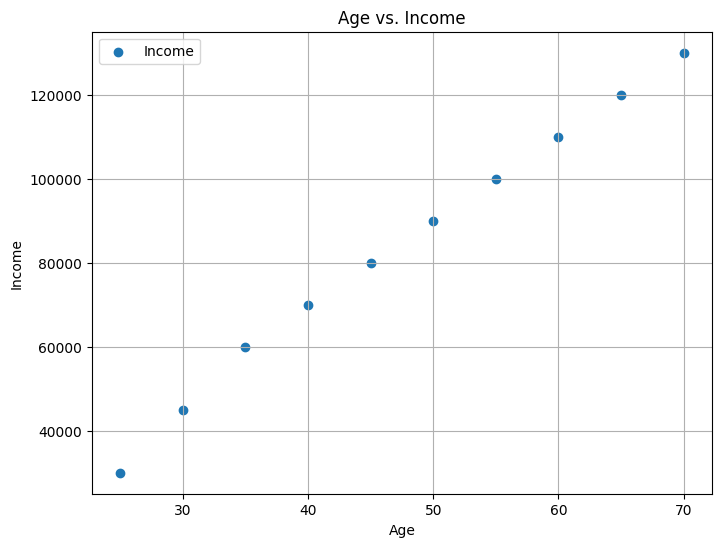

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_4['Age'], df_4['Income'], label='Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.legend()
plt.grid(True)
plt.show()

-- > In if we have to create our own csv and data set

In [25]:
import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'Student_ID': np.arange(1, 11),
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily', 'Frank', 'Grace', 'Hannah', 'Ian', 'Julia'],
    'Math_Score': np.random.randint(50, 100, 10),
    'Science_Score': np.random.randint(50, 100, 10),
    'English_Score': np.random.randint(50, 100, 10),
    'History_Score': np.random.randint(50, 100, 10)
}
df = pd.DataFrame(data)
df.to_csv('My_created.csv', index=False)
df

,Student_ID,Name,Math_Score,Science_Score,English_Score,History_Score
0,1,Alice,51,69,77,92
1,2,Bob,87,74,76,54
2,3,Charlie,59,63,55,55
3,4,David,76,85,97,65
4,5,Emily,99,88,76,53
5,6,Frank,91,83,87,62
6,7,Grace,90,60,54,70
7,8,Hannah,57,82,56,50
8,9,Ian,69,55,88,93
9,10,Julia,84,81,61,82
